In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data from the Excel files
qazly_data = pd.read_excel('Rudbar 1842 Census Qazly.xlsx')
javat_data = pd.read_excel('Rudbar 1842 Census Javat.xlsx')

# Example of data 
display(qazly_data.head())
display(javat_data.head())


,House Number,Family member,Relationship,Age,Sex,Settled/Nomadic,Amount of Arable Land,Wheat,Barley
0,1,Mammad son of Rahim,Father,52,Male,Settled,NaN,NaN,NaN
1,1,ShikhAli,Son,30,Male,Settled,NaN,NaN,NaN
2,1,Nur Ali,Son,20,Male,Settled,NaN,NaN,NaN
3,1,Ali Askar,Son,8,Male,Settled,NaN,NaN,NaN
4,1,Ali Akbar,Son,4,Male,Settled,NaN,NaN,NaN


,House Number,Family member,Relationship,Age,Sex,Settled/Nomadic,Amount of Arable Land,Wheat,Barley
0,1,Qasem son of Mourad,Husband,30,Male,Settled,19.0,12.0,4.0
1,1,Kheiranisa,Wife,25,Female,Settled,NaN,NaN,NaN
2,1,Sadat,Daughter,3,Female,Settled,NaN,NaN,NaN
3,1,Ahmadjan,Brother,25,Male,Settled,NaN,NaN,NaN
4,1,Fatima,Mother,60,Female,Settled,NaN,NaN,NaN


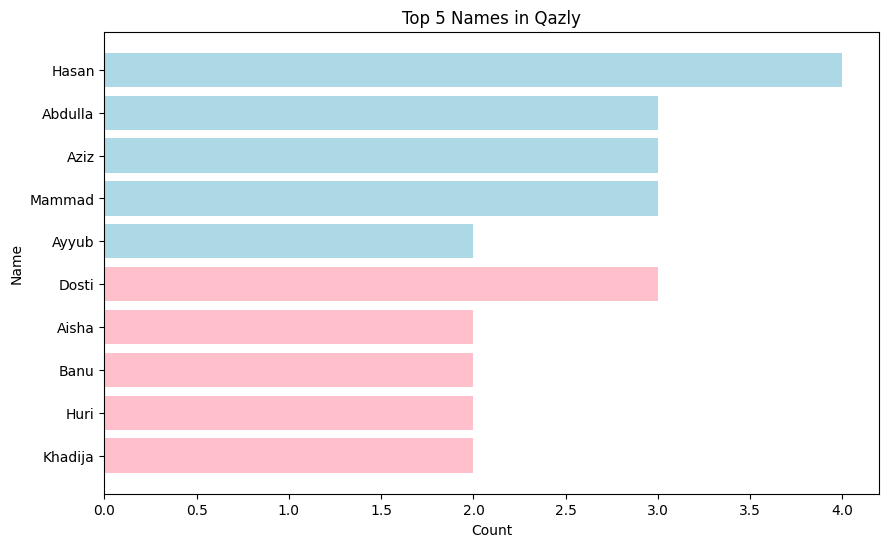

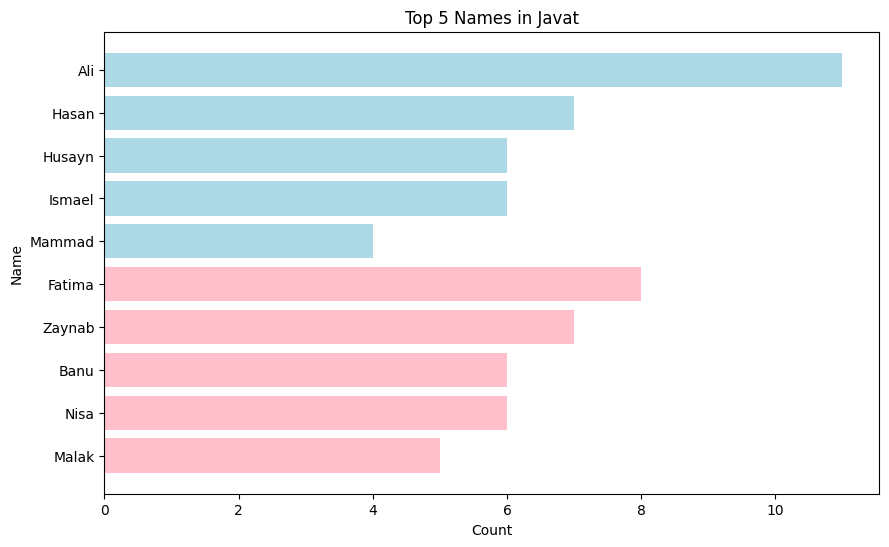

In [3]:

# Extracting the part before "son of"
qazly_data['Processed Name'] = qazly_data['Family member'].str.split(' son of').str[0]
javat_data['Processed Name'] = javat_data['Family member'].str.split(' son of').str[0]

# Group by Gender and Extracted Name to count occurrences
qazly_name_counts = qazly_data.groupby(['Sex', 'Processed Name']).size().reset_index(name='Count')
javat_name_counts = javat_data.groupby(['Sex', 'Processed Name']).size().reset_index(name='Count')

# Top 5 male and female names for Qazly
qazly_top_names = pd.concat([
    qazly_name_counts[qazly_name_counts['Sex'] == 'Male'].nlargest(5, 'Count'),
    qazly_name_counts[qazly_name_counts['Sex'] == 'Female'].nlargest(5, 'Count')
])

# Top 5 male and female names for Javat
javat_top_names = pd.concat([
    javat_name_counts[javat_name_counts['Sex'] == 'Male'].nlargest(5, 'Count'),
    javat_name_counts[javat_name_counts['Sex'] == 'Female'].nlargest(5, 'Count')
])

# Visualization of Top 5 Names in Qazly
plt.figure(figsize=(10, 6))
colors_qazly = ['lightblue' if gender == 'Male' else 'pink' for gender in qazly_top_names['Sex']]
plt.barh(qazly_top_names['Processed Name'], qazly_top_names['Count'], color=colors_qazly)
plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Top 5 Names in Qazly')
plt.gca().invert_yaxis()
plt.show()

# Visualization of Top 5 Names in Javat
plt.figure(figsize=(10, 6))
colors_javat = ['lightblue' if gender == 'Male' else 'pink' for gender in javat_top_names['Sex']]
plt.barh(javat_top_names['Processed Name'], javat_top_names['Count'], color=colors_javat)
plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Top 5 Names in Javat')
plt.gca().invert_yaxis()
plt.show()


In [4]:
# The number of males and females in each town
qazly_gender_counts = qazly_data['Sex'].value_counts()
javat_gender_counts = javat_data['Sex'].value_counts()

# Extract the counts for males and females
qazly_males = qazly_gender_counts.get('Male', 0)
qazly_females = qazly_gender_counts.get('Female', 0)

javat_males = javat_gender_counts.get('Male', 0)
javat_females = javat_gender_counts.get('Female', 0)


In [5]:
# Male-to-female ratio
qazly_ratio = qazly_males / qazly_females if qazly_females > 0 else 0
javat_ratio = javat_males / javat_females if javat_females > 0 else 0


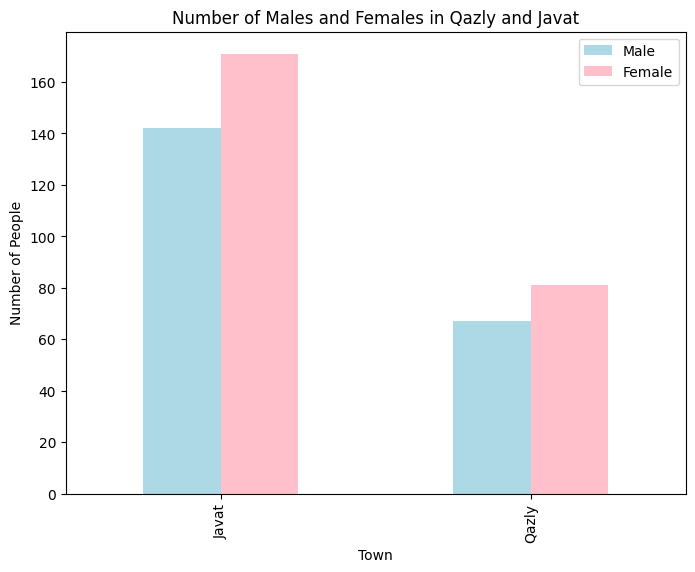

In [6]:
#DataFrame for the counts
gender_data = pd.DataFrame({
    'Town': ['Qazly', 'Qazly', 'Javat', 'Javat'],
    'Gender': ['Male', 'Female', 'Male', 'Female'],
    'Count': [qazly_males, qazly_females, javat_males, javat_females]
})

# 'Town' and 'Gender' as the index
gender_data.set_index(['Town', 'Gender'], inplace=True)

# Unstacking the 'Gender' index to get separate columns for males and females
gender_data = gender_data.unstack()

# Plotting the bar chart using matplotlib
gender_data.plot(kind='bar', color=['lightblue', 'pink'], figsize=(8, 6))

# Labels and title
plt.xlabel('Town')
plt.ylabel('Number of People')
plt.title('Number of Males and Females in Qazly and Javat')

plt.legend(['Male', 'Female'], loc='upper right')

# Plot
plt.show()

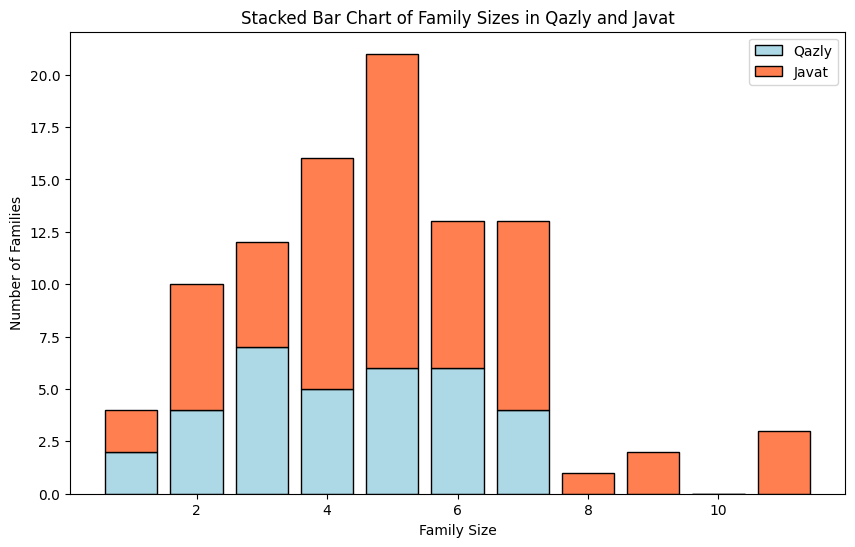

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Family sizes for each household in Qazly and Javat
qazly_family_sizes = qazly_data.groupby('House Number')['Family member'].count().values
javat_family_sizes = javat_data.groupby('House Number')['Family member'].count().values


qazly_family_sizes = np.array(qazly_family_sizes).flatten()
javat_family_sizes = np.array(javat_family_sizes).flatten()

bins = range(1, 13)  # Range
qazly_counts, _ = np.histogram(qazly_family_sizes, bins=bins)
javat_counts, _ = np.histogram(javat_family_sizes, bins=bins)

plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], qazly_counts, color='lightblue', label='Qazly', edgecolor='black')
plt.bar(bins[:-1], javat_counts, bottom=qazly_counts, color='coral', label='Javat', edgecolor='black')
plt.title('Stacked Bar Chart of Family Sizes in Qazly and Javat')
plt.xlabel('Family Size')
plt.ylabel('Number of Families')
plt.legend()
plt.show()


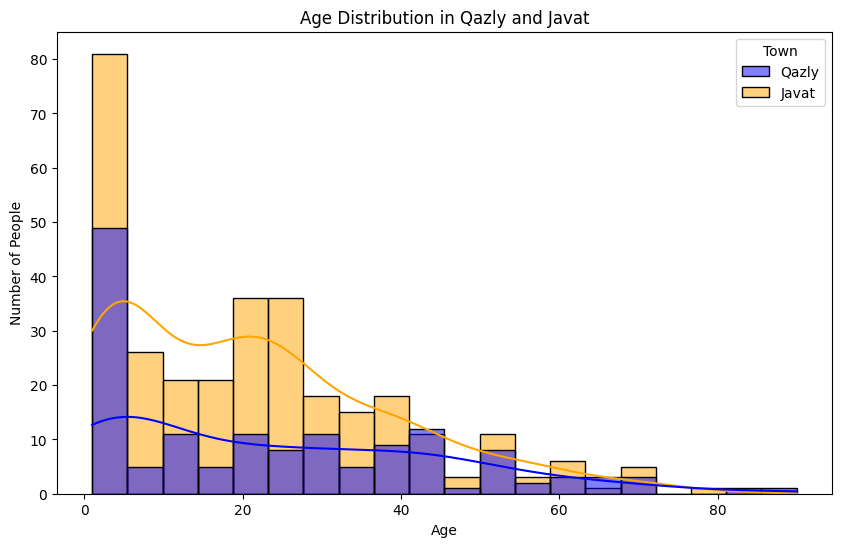

In [8]:


# Checking whether 'Age' column is numeric
qazly_data['Age'] = pd.to_numeric(qazly_data['Age'], errors='coerce')
javat_data['Age'] = pd.to_numeric(javat_data['Age'], errors='coerce')

# Dropping rows where 'Age' is NaN (if any)
qazly_data = qazly_data.dropna(subset=['Age'])
javat_data = javat_data.dropna(subset=['Age'])

# Checking if there is enough data to plot
if qazly_data['Age'].notna().sum() > 1 and javat_data['Age'].notna().sum() > 1:
    # Combined datasets for easier comparison
    qazly_data['Town'] = 'Qazly'
    javat_data['Town'] = 'Javat'
    combined_data = pd.concat([qazly_data, javat_data])

    # Combined Age Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_data, x='Age', hue='Town', bins=20, kde=True, palette=['blue', 'orange'])
    plt.xlabel('Age')
    plt.ylabel('Number of People')
    plt.title('Age Distribution in Qazly and Javat')
    plt.show()
else:
    print("Insufficient data to plot Age distribution for one or both towns.")


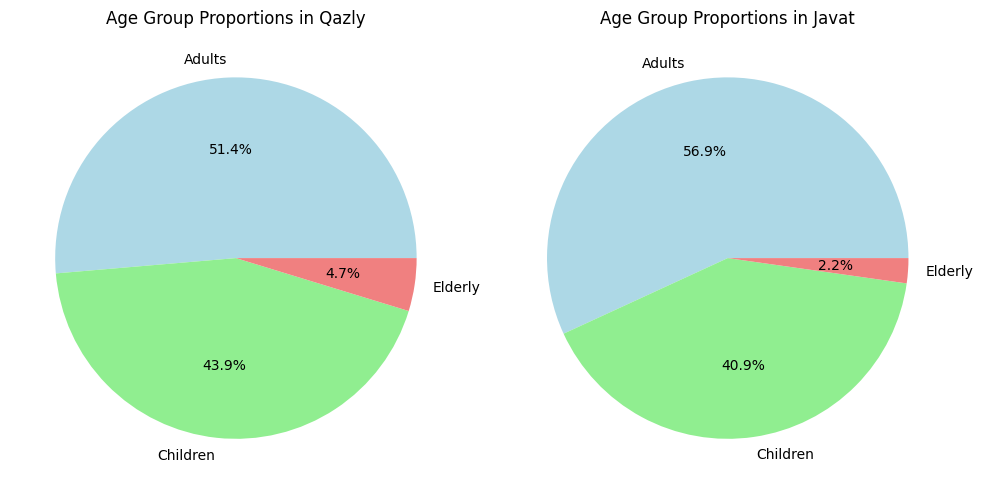

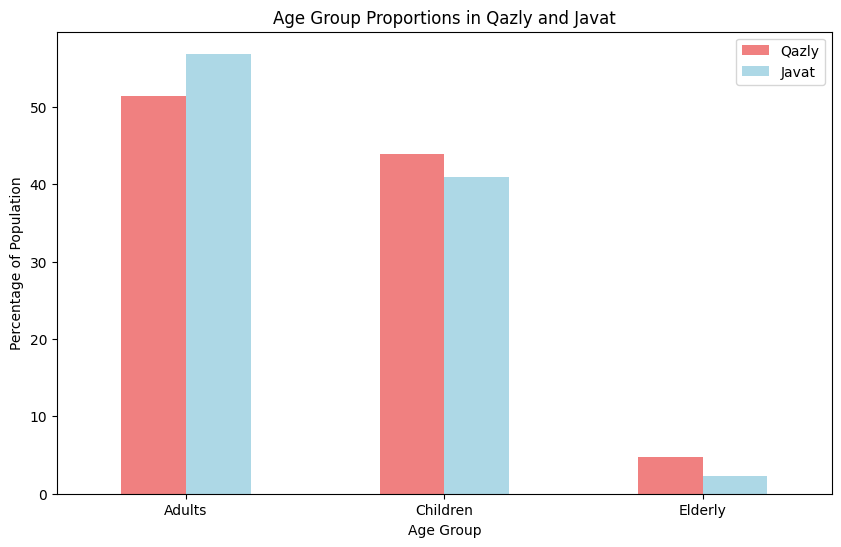

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#Age bins and labels
bins = [0, 14, 64, float('inf')]
labels = ['Children', 'Adults', 'Elderly']

# Step 2: Categorizing the age data into these bins for each town
qazly_data['Age Group'] = pd.cut(qazly_data['Age'], bins=bins, labels=labels, right=True)
javat_data['Age Group'] = pd.cut(javat_data['Age'], bins=bins, labels=labels, right=True)

# The proportion of each age group
qazly_age_group_proportions = qazly_data['Age Group'].value_counts(normalize=True) * 100
javat_age_group_proportions = javat_data['Age Group'].value_counts(normalize=True) * 100

#  Pie charts for proportion
plt.figure(figsize=(10, 5))

# Qazly
plt.subplot(1, 2, 1)
qazly_age_group_proportions.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Age Group Proportions in Qazly')
plt.ylabel('')  # Removed y-label for clarity

# Javat
plt.subplot(1, 2, 2)
javat_age_group_proportions.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Age Group Proportions in Javat')
plt.ylabel('')  # Removed y-label for clarity

plt.tight_layout()
plt.show()

# Bar plot
age_group_df = pd.DataFrame({'Qazly': qazly_age_group_proportions, 'Javat': javat_age_group_proportions})

age_group_df.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'lightblue'])
plt.title('Age Group Proportions in Qazly and Javat')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Population')
plt.xticks(rotation=0)  # Keeping x labels horizontal
plt.show()


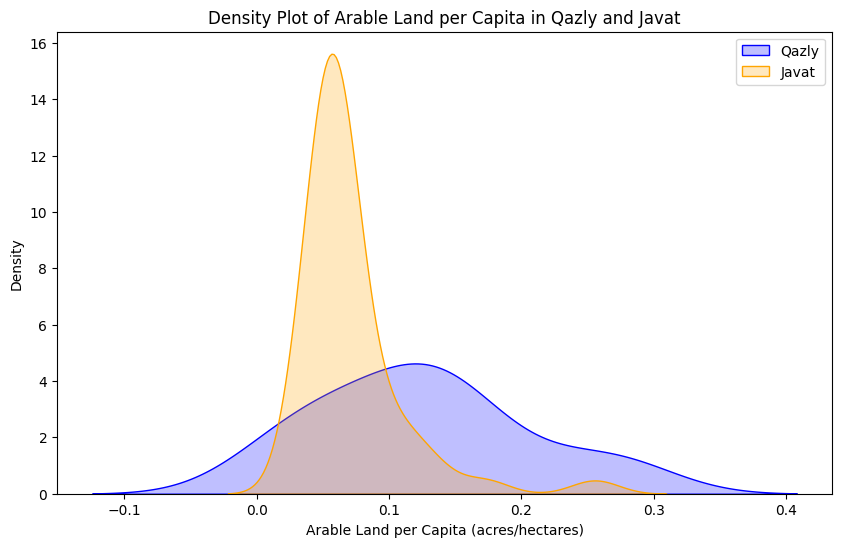

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# KDE plot for Qazly
sns.kdeplot(qazly_valid_land['Land per Capita'], fill=True, color="blue", label="Qazly")

# KDE plot for Javat
sns.kdeplot(javat_valid_land['Land per Capita'], fill=True, color="orange", label="Javat")

plt.title('Density Plot of Arable Land per Capita in Qazly and Javat')
plt.xlabel('Arable Land per Capita (acres/hectares)')
plt.ylabel('Density')
plt.legend()
plt.show()


Index(['House Number', 'Family member', 'Relationship', 'Age', 'Sex',
       'Settled/Nomadic', 'Amount of Arable Land', 'Wheat', 'Barley',
       'Processed Name', 'Town'],
      dtype='object')


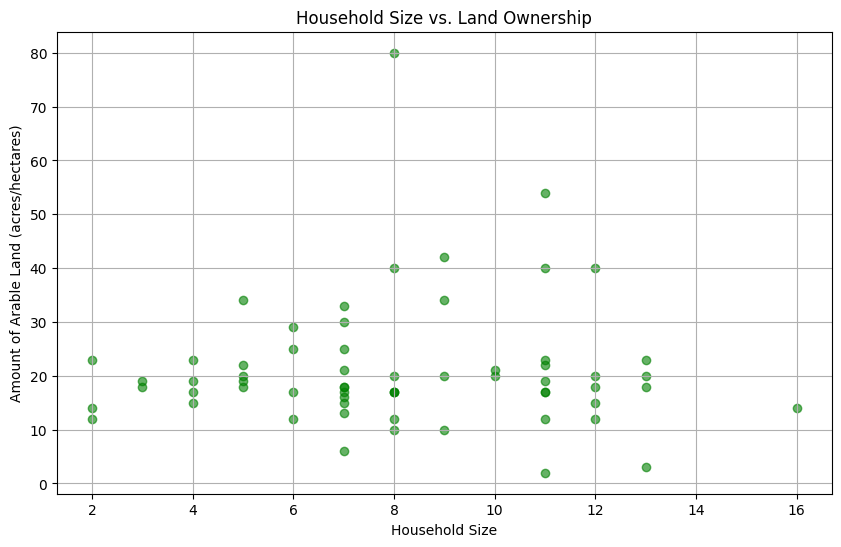

In [11]:
import matplotlib.pyplot as plt

print(combined_data.columns)

if 'Household Size' not in combined_data.columns:
    combined_data['Household Size'] = combined_data.groupby('House Number')['Family member'].transform('size')

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['Household Size'], combined_data['Amount of Arable Land'], alpha=0.6, color='green')

# Title and labels
plt.title('Household Size vs. Land Ownership')
plt.xlabel('Household Size')
plt.ylabel('Amount of Arable Land (acres/hectares)')

plt.grid(True)
plt.show()


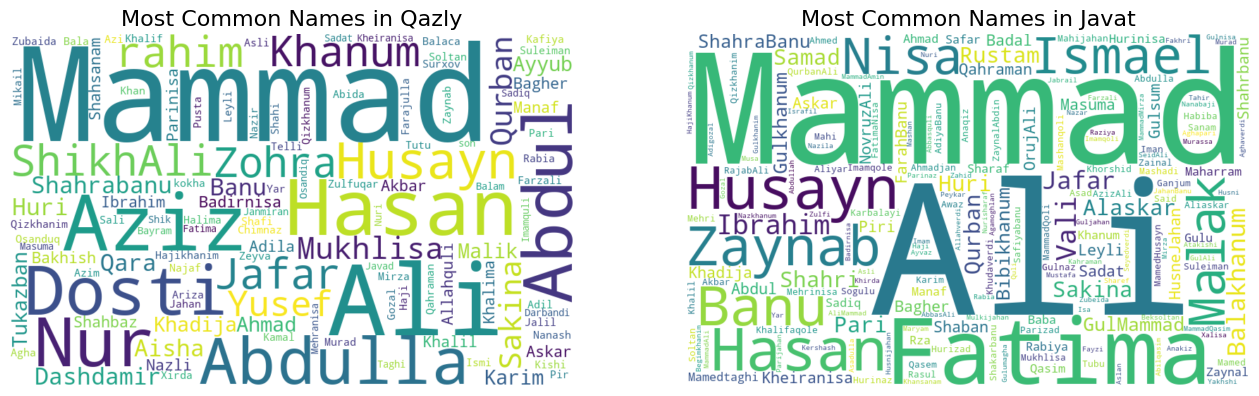

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

qazly_names = ' '.join(qazly_data['Processed Name'].dropna().astype(str))
javat_names = ' '.join(javat_data['Processed Name'].dropna().astype(str))

# Generate word clouds
wordcloud_qazly = WordCloud(width=800, height=500, background_color='white').generate(qazly_names)
wordcloud_javat = WordCloud(width=800, height=500, background_color='white').generate(javat_names)

# Display the word clouds using matplotlib
plt.figure(figsize=(16, 8))

# Qazly word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_qazly, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Names in Qazly', fontsize=16)

# Javat word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_javat, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Names in Javat', fontsize=16)

plt.show()
